# NCL notebook using Python2

First, you have to import the Image module from IPython.display to be able to display an PNG image inline the notebook.


In [13]:
from IPython.display import Image


With the command line
```python 
%%writefile <file name>
```

the content of the code cell underneath this line will be written into the file <file name> in current the directory. If it already exist it will be overwritten.  


In [14]:
%%writefile ipython_ncl.ncl
begin

  f = addfile("$HOME/NCL/NUG/Version_1.0/data/rectilinear_grid_2D.nc","r")
  printVarSummary(f)


  t = f->tsurf
  printVarSummary(t)

  wks_type            = "png"
  wks_type@wkWidth    = 800
  wks_type@wkHeight   = 800
  wks = gsn_open_wks(wks_type,"plot_contour")

  res                 =  True
  res@gsnMaximize     =  True
  res@cnFillOn        =  True
  res@cnLevelSpacingF =  5
  res@tiMainString    = "Title string"

  plot = gsn_csm_contour_map(wks,t(1,:,:),res)

end

Overwriting ipython_ncl.ncl




Running the NCL script and save messages from stdout into the file log. Cut off the white space around the plot and displa ythe plot inline.



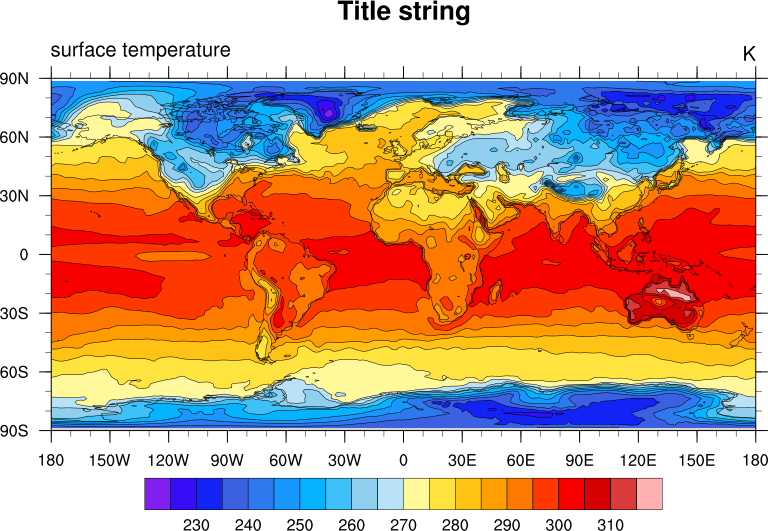

In [15]:
!ncl ipython_ncl.ncl > log
!convert -trim +repage plot_contour.png plot_contour_small.png
Image('plot_contour_small.png')